In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataf = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_3/Day_5/Morning/Jahn-lab-imbalanced-data/files_for_lab/customer_churn.csv')
dataf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
dataf.shape

(7043, 21)

In [4]:
dataf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
def clean_column_names(df):
    df.columns = map(str.lower, df.columns)
    return df

In [6]:
datafclean = clean_column_names(dataf)

In [7]:
datafclean.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
selected_columns = ['tenure','seniorcitizen','monthlycharges','churn']
df_new = datafclean.loc[:, selected_columns].copy()

In [9]:
df_new.head()

,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [10]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


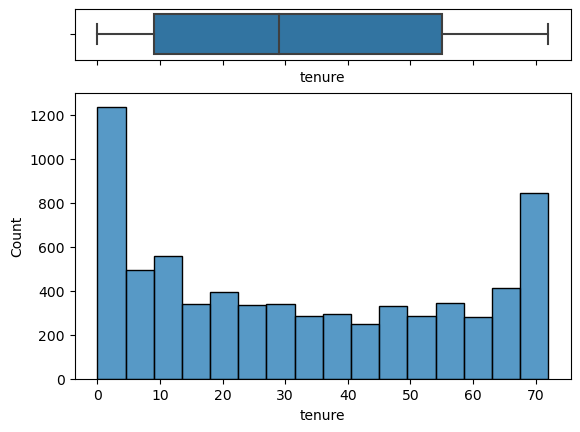

In [11]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_new, x="tenure", ax=ax_box)
sns.histplot(data=df_new, x="tenure", ax=ax_hist)
plt.show()

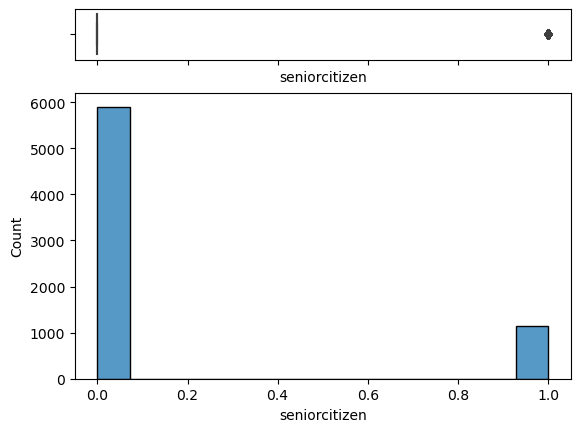

In [12]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_new, x="seniorcitizen", ax=ax_box)
sns.histplot(data=df_new, x="seniorcitizen", ax=ax_hist)
plt.show()

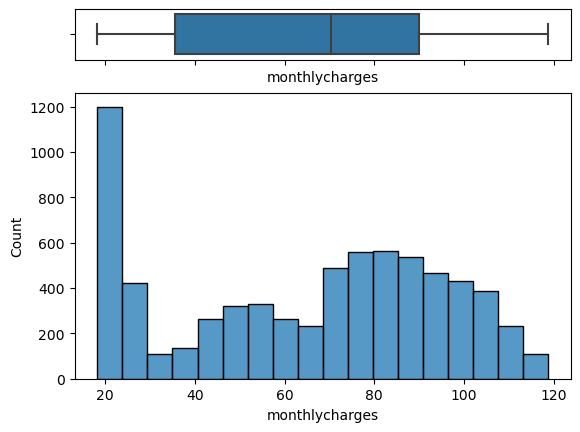

In [13]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_new, x="monthlycharges", ax=ax_box)
sns.histplot(data=df_new, x="monthlycharges", ax=ax_hist)
plt.show()

In [14]:
(df_new['tenure'].skew() > 2) or (df_new['tenure'].skew() < -2), df_new['tenure'].skew()

(False, 0.2395397495619829)

In [15]:
(df_new['seniorcitizen'].skew() > 2) or (df_new['seniorcitizen'].skew() < -2), df_new['seniorcitizen'].skew()

(False, 1.8336327440928564)

In [16]:
(df_new['monthlycharges'].skew() > 2) or (df_new['monthlycharges'].skew() < -2), df_new['monthlycharges'].skew()

(False, -0.22052443394398033)

/var/folders/h1/sm0yz6nx7m9cgsn8627qx6c00000gn/T/ipykernel_95082/3574033641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_new.corr(method='pearson')


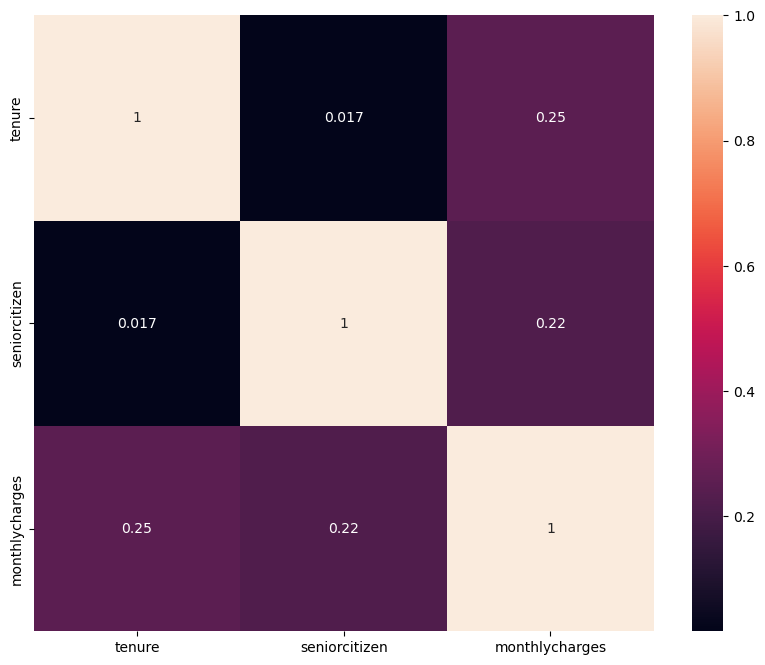

In [17]:
corr_matrix=df_new.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
y = df_new['churn']
X = df_new.drop(['churn'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [20]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

scaler.fit(X_train) # fit() Determine the min and the max of each column in the TRAIN set

X_train_scaled = scaler.transform(X_train) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled  = scaler.transform(X_test) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns = X.columns)

X_train_scaled_df.head()

,tenure,seniorcitizen,monthlycharges
0,0.611111,0.0,0.358706
1,0.375000,0.0,0.769652
2,0.027778,0.0,0.504478
3,0.027778,0.0,0.020896
4,0.166667,1.0,0.652239


In [21]:
X_train_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5634.0,0.449994,0.341370,0.0,0.125000,0.402778,0.777778,1.0
seniorcitizen,5634.0,0.161874,0.368368,0.0,0.000000,0.000000,0.000000,1.0
monthlycharges,5634.0,0.460355,0.300138,0.0,0.166667,0.516915,0.711443,1.0


In [22]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')

classification.fit(X_train_scaled_df, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [23]:
y_train_pred = classification.predict(X_train_scaled_df)
y_test_pred  = classification.predict(X_test_scaled_df)
print("The first predictions on the TRAIN set are: ",y_train_pred[:10])
print("The first predictions on the TEST set are: ",y_test_pred[:10])

The first predictions on the TRAIN set are:  ['No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No']
The first predictions on the TEST set are:  ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

In [25]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

The confusion matrix on the TRAIN set is: 


array([[3800,  349],
       [ 813,  672]])

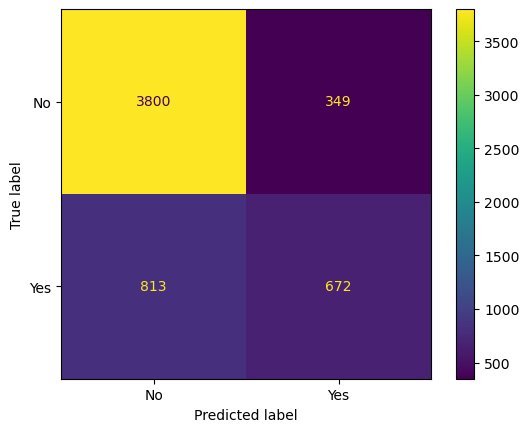

In [26]:
disp = ConfusionMatrixDisplay(cm_train, display_labels=classification.classes_);
disp.plot()
plt.show()

The confusion matrix on the TEST set is: 
[[923 102]
 [212 172]]


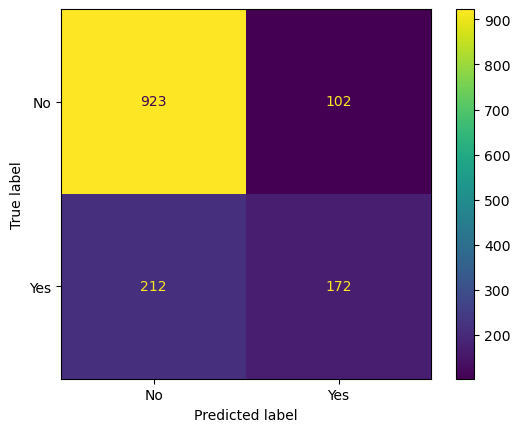

In [27]:
print("The confusion matrix on the TEST set is: ")
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.show()

In [28]:
y_train.value_counts()

No     4149
Yes    1485
Name: churn, dtype: int64

In [29]:
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy in the TRAIN set is: 0.794
The accuracy in the TEST  set is: 0.777


In [30]:
print("The precission in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label="Yes")))
print("The precission in the TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred, pos_label="Yes")))

The precission in the TRAIN set is: 0.658
The precission in the TEST  set is: 0.628


In [31]:
print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label="Yes")))
print("The recall in the TEST  set is: {:.3f}".format(recall_score(y_test,  y_test_pred, pos_label="Yes")))

The recall in the TRAIN set is: 0.453
The recall in the TEST  set is: 0.448


In [32]:
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label="Yes")))

The F1-score for the TRAIN set is 0.54


In [33]:
print(classification_report(y_train, y_train_pred,target_names=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.82      0.92      0.87      4149
          No       0.66      0.45      0.54      1485

    accuracy                           0.79      5634
   macro avg       0.74      0.68      0.70      5634
weighted avg       0.78      0.79      0.78      5634



In [34]:
print(classification_report(y_test, y_test_pred,target_names=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.81      0.90      0.85      1025
          No       0.63      0.45      0.52       384

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.76      1409



In [35]:
from sklearn.metrics import cohen_kappa_score

In [36]:
cohen_kappa_score(y_train, y_train_pred)

0.40948478112980236

In [39]:
from imblearn.over_sampling import SMOTE

In [41]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [43]:
y_pred = logreg.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7097232079489
